In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

saeed = 42

np.random.seed(saeed)

df = pd.read_csv("/Users/a./Desktop/Course T5/my exersi/Salary Data.csv")

In [3]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [14]:
print("The number of null value in each columns:\n", df.isnull().sum())

The number of null value in each columns:
 Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64


# check the null

In [16]:
df[df['Gender'].isnull()]

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
172,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.dropna(subset ='Age' ,inplace = True)

In [21]:
df.isnull().sum().sum()

0

In [22]:
df.value_counts().sum()

373

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 373 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 20.4+ KB


In [27]:
df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [30]:
print("Number Of Duplicated: ",df.duplicated().sum())

Number Of Duplicated:  49


In [36]:
df.drop_duplicates(inplace = True) 

In [37]:
df.reset_index(inplace = True, drop = True)

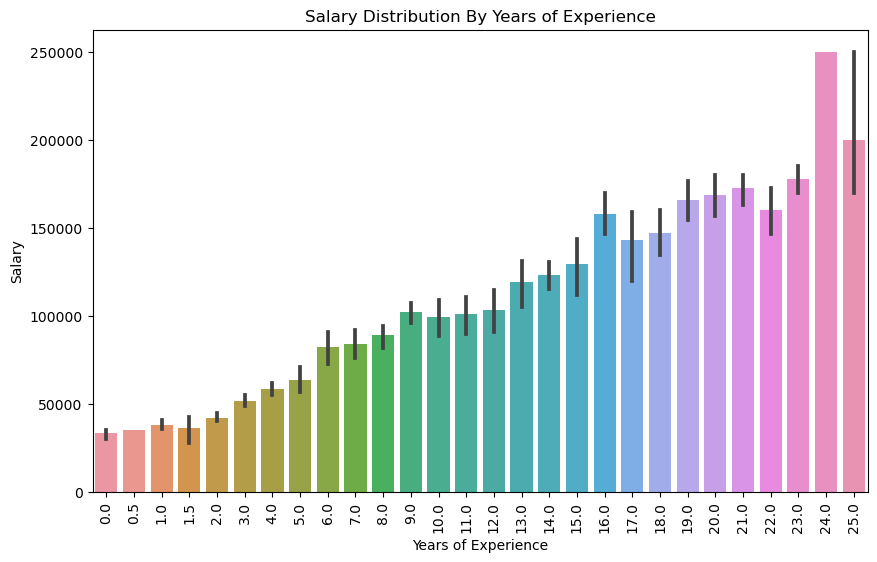

In [51]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Years of Experience' , y = 'Salary', data = df )
plt.title("Salary Distribution By Years of Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

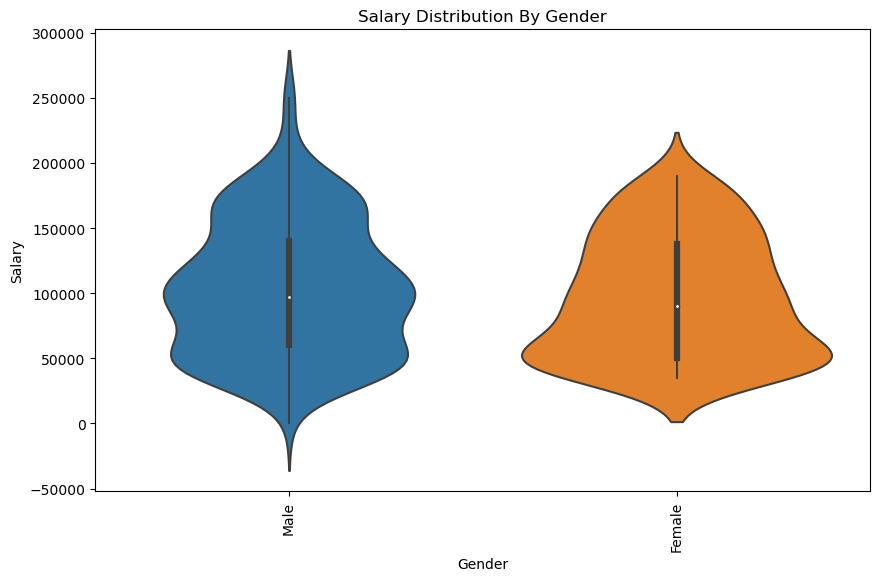

In [48]:
plt.figure(figsize=(10,6))
sns.violinplot(x = 'Gender' , y = 'Salary', data = df )
plt.title("Salary Distribution By Gender")
plt.xlabel("Gender")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

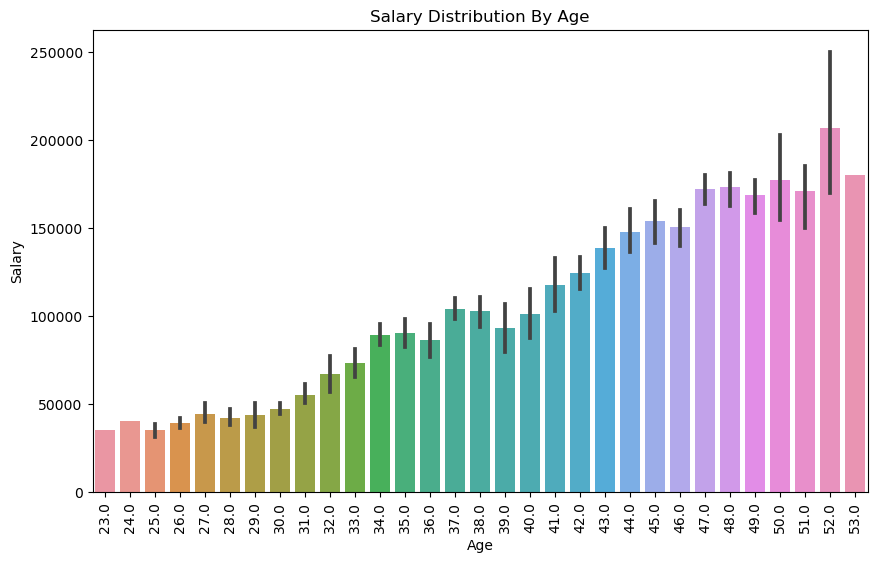

In [54]:
plt.figure(figsize=(10,6))
sns.barplot(x = 'Age' , y = 'Salary', data = df )
plt.title("Salary Distribution By Age")
plt.xlabel("Age")
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer



In [87]:
X = df.drop('Salary', axis = 1)
y = df['Salary']

In [88]:
x_train,x_test,y_train,y_test = train_test_split(X , y , test_size = 0.2 , random_state = saeed)

In [89]:
x_train.head()

,Age,Gender,Education Level,Job Title,Years of Experience
73,28.0,Male,Bachelor's,Technical Support Specialist,2.0
181,44.0,Female,PhD,Senior UX Designer,15.0
17,39.0,Male,PhD,Senior Engineer,12.0
24,41.0,Male,Master's,Financial Manager,13.0
146,42.0,Female,PhD,Senior Data Scientist,16.0


In [90]:
y_train.head()

73      40000.0
181    145000.0
17     115000.0
24     140000.0
146    150000.0
Name: Salary, dtype: float64

In [91]:
print("number of x_train:",x_train.shape,"\nnumber of x_test:",x_test.shape)

number of x_train: (259, 5) 
number of x_test: (65, 5)


In [92]:
print("number of y_train:",y_train.shape,"\nnumber of y_test:",y_test.shape)

number of y_train: (259,) 
number of y_test: (65,)


In [110]:
#numberic Features 
numberic_Features = ['Age' , 'Years of Experience']

numberic_Transformer = Pipeline(steps = [('Imputer',SimpleImputer(strategy = 'mean')),
                                         ('scaler',StandardScaler())])


categorical_features = ["Gender", "Education Level", "Job Title"]
cat_Transformer = Pipeline(steps = [('Imputer',SimpleImputer(strategy = 'constant')),
                                    ('encoder',OneHotEncoder(handle_unknown = 'ignore'))])


preprocessor = ColumnTransformer(transformers = [('num',numberic_Transformer,numberic_Features),
                                                 ('cat',cat_Transformer,categorical_features)])
                                 
                                 

In [111]:
model = Pipeline(steps = [('preprocessor',preprocessor),
                          ('Regression',LinearRegression())])

In [112]:
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('Regression', LinearRegression())])

In [115]:
model.fit(x_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Years of Experience']),
                                                 ('cat',
                                                  Pipeline(steps=[('Imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Gender', 'Education Level',
                                                   'Job Title'])])),
                ('Regression', LinearRegression())])

In [117]:
y_pred = model.predict(x_test)

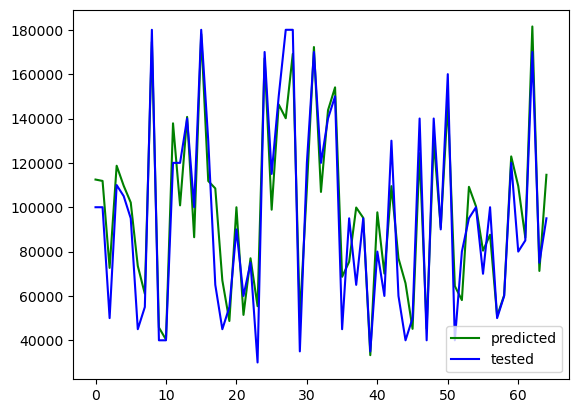

In [123]:
plt.plot(range(len(y_pred)), y_pred,label="predicted" , c = 'g')
plt.plot(range(len(y_test)), y_test,label="tested" , c = 'blue')
plt.legend()
plt.show()

In [124]:
model.score(x_test,y_test)

0.8670436996224894

In [127]:
mse = mean_squared_error(y_test, model.predict(x_test))
    
    
print('R2:',r2_score(y_test, model.predict(x_test)))
print('RMSE:', np.sqrt(mse))

R2: 0.8670436996224894
RMSE: 15851.154079793168
